In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [4]:
def sigmoid(x,w,b):
    return 1 / (1 + np.exp(-(w*x+b)))

In [5]:
sigmoid(2,-0.5,1)

0.5

In [6]:
def sigmoid_2d(x1,x2,w1,w2,b):
    return 1 / (1 + np.exp(-(w1*x1+w2*x2+b)))

In [7]:
sigmoid_2d(1,6,.6,0.5,0)

0.973403006423134

In [8]:
X = [-6, -8, -10, -12, -14, -16, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
print([sigmoid(x,-1.8,0) for x in X])

[0.9955037268390589, 0.9890130573694068, 0.973403006423134, 0.9370266439430035, 0.8581489350995123, 0.5, 0.14185106490048777, 0.06297335605699649, 0.026596993576865856, 0.01098694263059318, 0.004496273160941178]


[3.3631964038671175e-05, 9.189805133719969e-07, 2.5109990926928157e-08, 6.860984394986131e-10, 1.8746763344891372e-11, 5.122313584302293e-13, 0.0012293986212774202, 0.043107254941086116, 0.6224593312018546, 0.9836975006285591, 0.9995473777767595, 0.9999876272288255, 0.999999661925766, 0.9999999907625504, 0.9999999997475986, 0.9999999999931035, 0.9999999999998115]


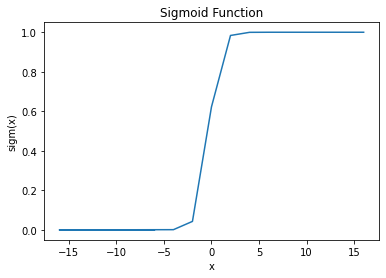

In [22]:
X = [-6, -8, -10, -12, -14, -16, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
print([sigmoid(x,1.8,0.5) for x in X])
Y=[sigmoid(x,1.8,0.5) for x in X]
plt.plot(X, Y)
plt.xlabel('x')
plt.ylabel('sigm(x)')
plt.title('Sigmoid Function')
plt.show()

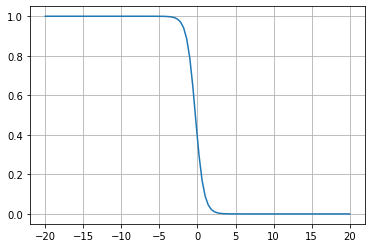

In [17]:
w=-1.8
b=-0.5
A=np.linspace(-20,20,100)
Y=sigmoid(A,w,b)
plt.plot(A,Y)
plt.grid()
plt.show()

In [19]:
P1=np.linspace(-10, 10, 100)
P2=np.linspace(-10, 10, 100)

Q1,Q2=np.meshgrid(P1,P2)
print("P1 shape:",P1.shape)
print("P2 shape:",P2.shape)
print("Q1 shape:",Q1.shape)
print("Q2 shape:",Q2.shape)

P1 shape: (100,)
P2 shape: (100,)
Q1 shape: (100, 100)
Q2 shape: (100, 100)


In [20]:
w1=2
w2=-0.5
b=0
Y=sigmoid_2d(Q1,Q2,w1,w2,b)

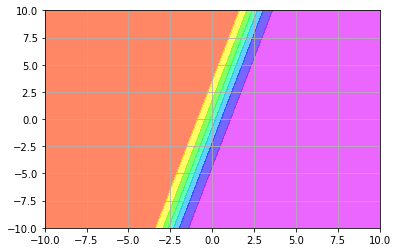

In [24]:
plt.contourf(Q1,Q2,Y,cmap="gist_rainbow", alpha=0.6)
plt.grid()
plt.show()

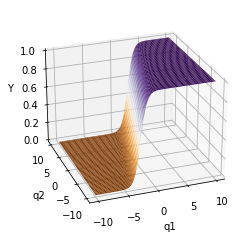

In [9]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(Q1,Q2,Y,cmap='PuOr')
ax.set_xlabel('q1')
ax.set_ylabel('q2')
ax.set_zlabel('Y')
ax.view_init(25,250)

In [53]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
  
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
  
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)

    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        for i in range(epochs):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)       
            self.w -= learning_rate * dw
            self.b -= learning_rate * db

In [54]:
# Fit for toy data - Points and their classes are given
X = np.asarray([[1.5, 2.5], [9, -1], [1, -6], [-3, 5.25], [-2, -4], [1, 5], [4, 3], [-1, -4], [2, 2], [-2, 3]])
Y = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0]

sn = SigmoidNeuron()
sn.fit(X, Y, 10, 0.15, True)

In [55]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap='YlGnBu', alpha=0.6)
    ax.scatter(X[:,0], X[:,1],c=Y, cmap='cool')
    ax.plot()

[[-0.3018083  -0.35766343]] [-0.0617217]
[[ 1.44217461 -0.18684017]] [-0.1747487]
[[ 1.62934663 -0.43118587]] [-0.51899348]
[[ 1.87453839 -0.32780886]] [-0.72309218]
[[ 2.02936074 -0.42385123]] [-0.8718384]
[[ 2.18337894 -0.44499824]] [-0.97722943]
[[ 2.31862094 -0.47411533]] [-1.06220837]
[[ 2.44101399 -0.50033072]] [-1.13279446]
[[ 2.55255734 -0.52448177]] [-1.19318998]
[[ 2.65493774 -0.54682518]] [-1.2459927]
[[ 2.74948768 -0.56758479]] [-1.29292906]
[[ 2.83727443 -0.58694976]] [-1.33519969]
[[ 2.91916415 -0.60508011]] [-1.37367111]
[[ 2.99586871 -0.6221117 ]] [-1.40898811]
[[ 3.06797995 -0.63816041]] [-1.44164298]
[[ 3.13599505 -0.65332565]] [-1.47201989]
[[ 3.20033565 -0.66769319]] [-1.50042432]
[[ 3.26136232 -0.68133739]] [-1.52710323]
[[ 3.31938577 -0.69432311]] [-1.55225909]
[[ 3.37467561 -0.70670717]] [-1.57606007]
[[ 3.42746726 -0.71853962]] [-1.5986474]
[[ 3.47796747 -0.72986471]] [-1.62014087]
[[ 3.52635874 -0.74072177]] [-1.64064304]
[[ 3.57280297 -0.75114586]] [-1.6602424

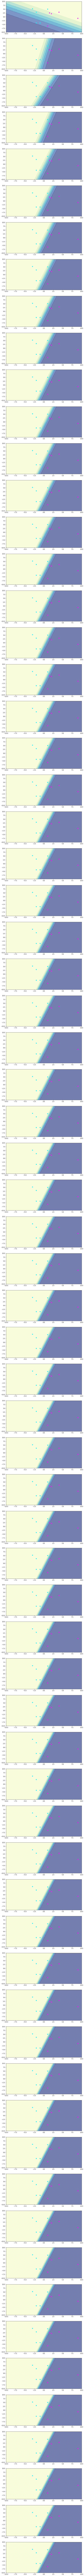

In [56]:
sn.fit(X, Y, 10, 0.05, True)

# Number of epoch
N = 70
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i + 1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 5, 0.5, False)